In [72]:
#Performing standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
df = pd.read_csv('Social_Network_Ads.csv')

In [74]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [76]:
X = df[['Age','EstimatedSalary']].values
y = df['Purchased'].values

In [77]:
# feature Scaling
from sklearn.preprocessing import StandardScaler

In [78]:
sc = StandardScaler()

In [79]:
X = sc.fit_transform(X)

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [82]:
from sklearn.svm import SVC

In [111]:
classifier = SVC(kernel='rbf',random_state=0,gamma=0.8)

In [112]:
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.8, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [113]:
y_pred = classifier.predict(X_test)

In [124]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred)


array([[58,  5],
       [ 1, 36]], dtype=int64)

In [125]:
Accuracy = (58+36)/100
Accuracy

0.94

In [116]:
# K-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier,X_train,y_train,cv=10)

In [117]:
print(f"accuracies : {accuracies}  \nMean :{accuracies.mean()*100}% \nStandard_deviation : {accuracies.std()*100}%")


accuracies : [1.         0.87096774 0.93548387 0.96774194 0.93333333 0.86666667
 0.89655172 0.82758621 0.89655172 0.93103448]  
Mean :91.25917686318132% 
Standard_deviation : 4.853691434804857%


In [118]:
#Grid Search
from sklearn.model_selection import GridSearchCV

In [119]:
params = [{'C':[1.0,10,100], 'kernel':['linear']},
    {'C':[1.0,10,100],'kernel':['rbf'],'gamma':[0.5,0.6,0.7,0.8,1.0]}]
grid_search = GridSearchCV(classifier,params,cv=10,n_jobs=-1)

In [120]:
grid_search.fit(X_train,y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.8,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=0, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [1.0, 10, 100], 'kernel': ['linear']},
                         {'C': [1.0, 10, 100],
                          'gamma': [0.5, 0.6, 0.7, 0.8, 1.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [121]:
grid_search.best_score_


0.9133333333333333

In [122]:
grid_search.best_params_

{'C': 1.0, 'gamma': 0.8, 'kernel': 'rbf'}

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


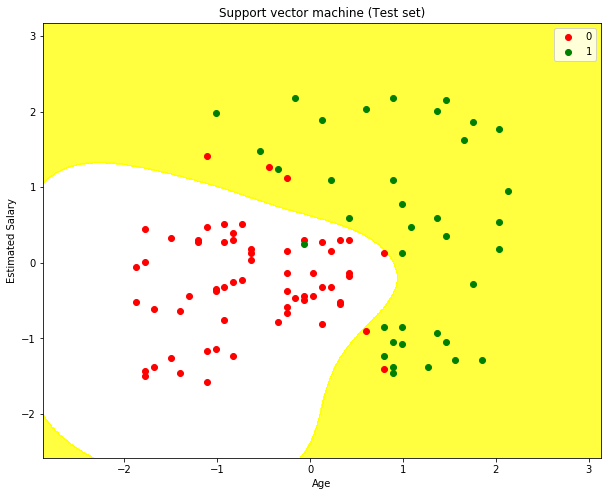

In [123]:
# Visualising the Test set results
plt.figure(figsize=(10,8))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('white', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support vector machine (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()